## Centroid Clustering 
> We will cover one of the most popular algorithms K-means

In [1]:
#libraries 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

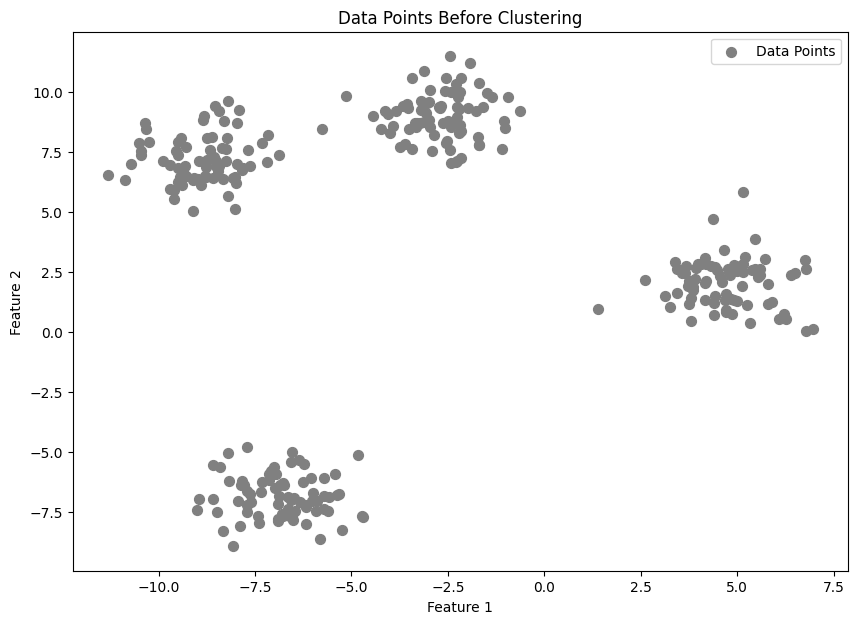

In [19]:
# Simulate some data for clustering
X, y = make_blobs(n_samples=300, centers=4, random_state=42)


# Plotting initial data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', label='Data Points')
plt.title("Data Points Before Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



### 1. Initial Centroid Selection

In the first step, K-Means selects random initial centroids. Let's visualize the starting positions.


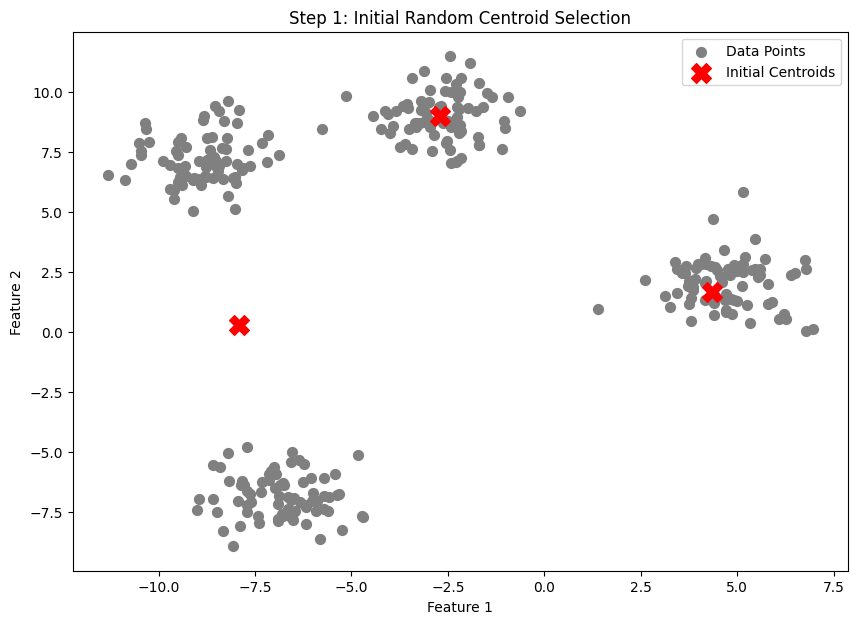

In [20]:
# Initialize KMeans with only one iteration to capture the initial step
kmeans = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1, random_state=42)
kmeans.fit(X)

# Plot initial centroids and data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Initial Centroids', marker='X')
plt.title("Step 1: Initial Random Centroid Selection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### 2. Assigning Points to Nearest Centroid

Next, each data point is assigned to the nearest centroid, forming preliminary clusters. Below, we show data points colored by their assigned cluster.


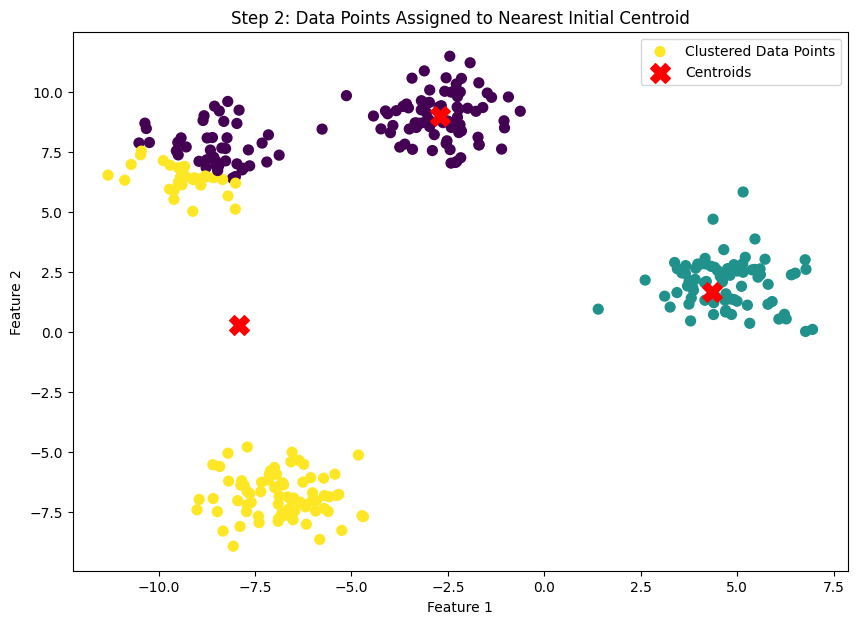

In [21]:


# Assign data points to nearest centroid
labels = kmeans.predict(X)

# Plot data points with color-coded clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Clustered Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title("Step 2: Data Points Assigned to Nearest Initial Centroid")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### 3. Updating Centroids

After assigning points, the centroids are updated by calculating the mean of points in each cluster. We display the centroid movement here.


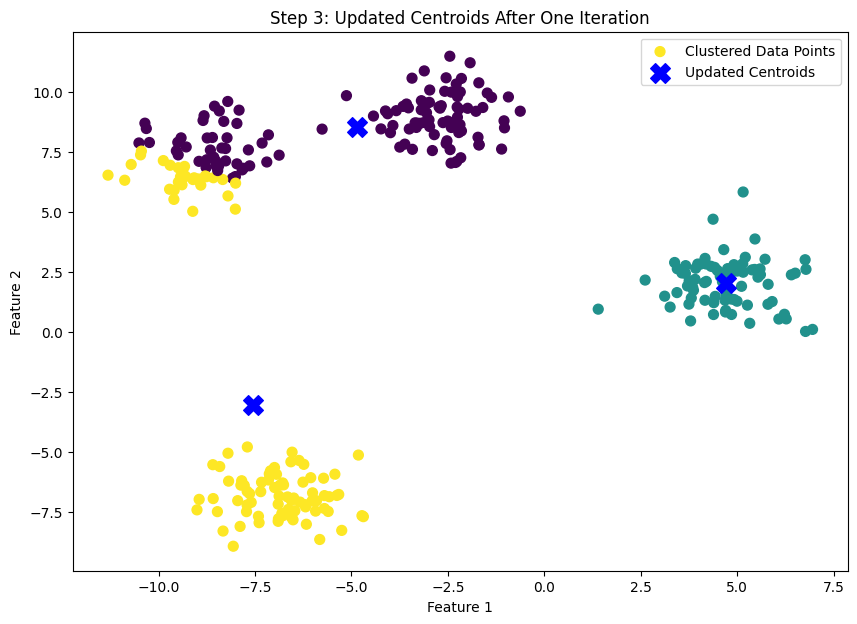

In [23]:
# Update centroids by running another iteration
kmeans = KMeans(n_clusters=3, init='random', n_init=1, max_iter=2, random_state=42)
kmeans.fit(X)

# Plot updated centroids
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Clustered Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='blue', label='Updated Centroids', marker='X')
plt.title("Step 3: Updated Centroids After One Iteration")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### 4. Convergence

The algorithm repeats these steps until centroids no longer move significantly. This usually indicates that the clusters have stabilized. Below is the final output of the algorithm.


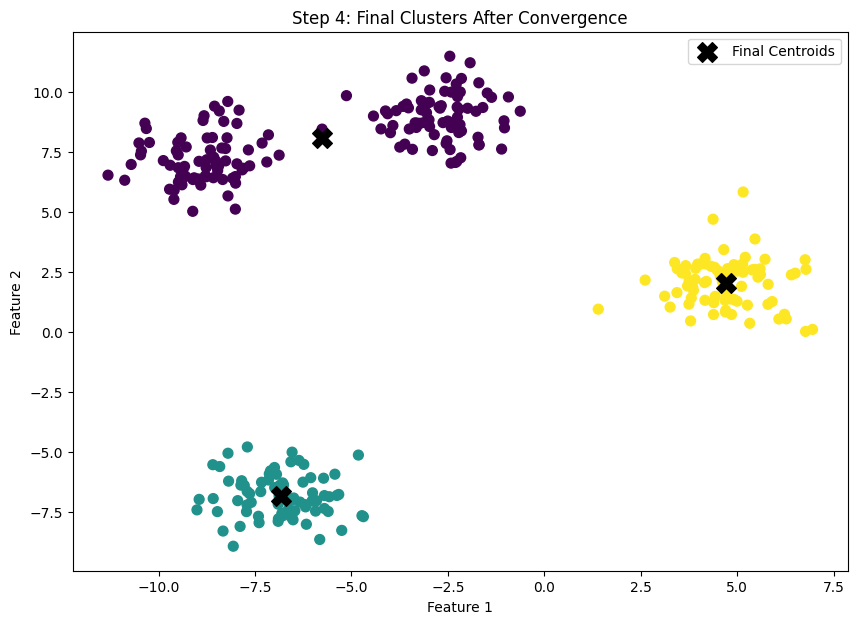

In [24]:


# Run KMeans until convergence
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_final.fit(X)

# Plot final clustering
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_final.labels_, s=50, cmap='viridis')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=200, c='black', label='Final Centroids', marker='X')
plt.title("Step 4: Final Clusters After Convergence")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



### What can be a problem here ?
How can we choose the number of clusters ?

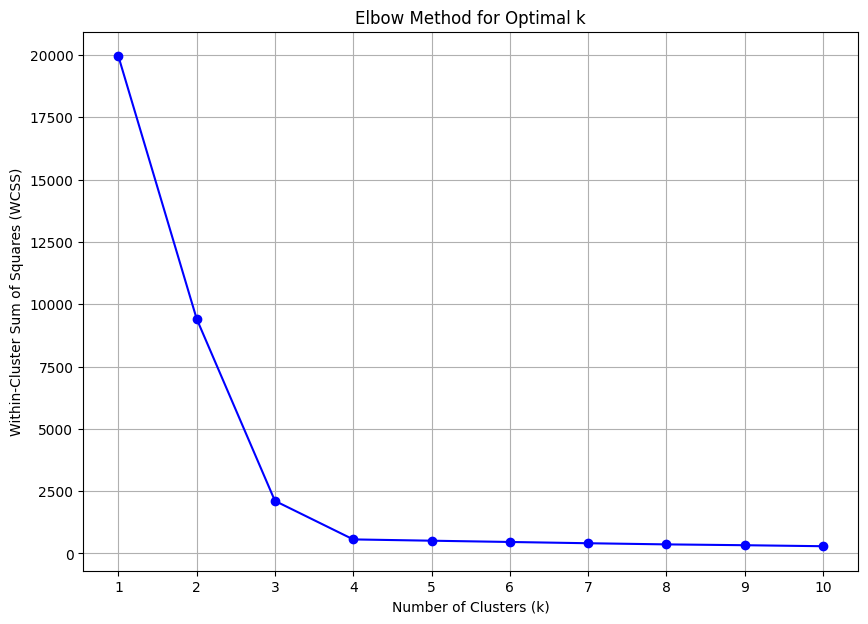

In [25]:
# Calculate WCSS for a range of cluster numbers
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 7))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# we will talk about metrics more next session but just a brief intro to one metric

### Understanding Within-Cluster Sum of Squares (WCSS)

**WCSS**, or **Within-Cluster Sum of Squares**, is a metric that quantifies the total variance within each cluster in a K-Means model. It’s calculated as the sum of the squared distances between each data point and its assigned cluster centroid. 



### Why WCSS is Important

Lower WCSS values indicate that points within clusters are closer to each other, forming more compact clusters. As we increase the number of clusters \( k \), WCSS typically decreases because clusters become smaller and more specific. However, increasing \( k \) beyond a certain point may not significantly reduce WCSS, which shows that adding more clusters does not improve the clustering meaningfully.

This is where the **Elbow Method** comes in, helping us choose an optimal \( k \) where the reduction in WCSS begins to level off. The point where the "elbow" occurs in the WCSS plot suggests the optimal number of clusters.
